In [114]:
# import findspark
# findspark.init()

In [1]:
import pyspark
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import isnan, when, count, col, lit, trim, avg, ceil
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Create the Spark environment for this project.
spark = SparkSession.builder.master("local[*]").getOrCreate()
# sc=spark.sparkContext


In [4]:
# Load the data and creating DataFrame using spark
Accidents_Data = spark.read.csv("dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021.csv",
                      inferSchema=True,header=True)
Causality_Data = spark.read.csv("dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2021.csv",
                      inferSchema=True,header=True)
Vehicles_Data = spark.read.csv("dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2021.csv",
                      inferSchema=True,header=True)

In [5]:
#Counting No of rows in a dataframe
Causality_Data.count()

53174

In [6]:
Accidents_Data.count()

42358

In [7]:
Vehicles_Data.count()

78411

In [8]:
#Counting no of columns in a dataframe
len(Causality_Data.columns)

19

In [9]:
len(Accidents_Data.columns)

37

In [10]:
len(Vehicles_Data.columns)

28

In [11]:
#Printing Schema
Accidents_Data.printSchema()

root
 |-- status: string (nullable = true)
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)

In [12]:
Causality_Data.printSchema()

root
 |-- status: string (nullable = true)
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- vehicle_reference: integer (nullable = true)
 |-- casualty_reference: integer (nullable = true)
 |-- casualty_class: integer (nullable = true)
 |-- sex_of_casualty: integer (nullable = true)
 |-- age_of_casualty: integer (nullable = true)
 |-- age_band_of_casualty: integer (nullable = true)
 |-- casualty_severity: integer (nullable = true)
 |-- pedestrian_location: integer (nullable = true)
 |-- pedestrian_movement: integer (nullable = true)
 |-- car_passenger: integer (nullable = true)
 |-- bus_or_coach_passenger: integer (nullable = true)
 |-- pedestrian_road_maintenance_worker: integer (nullable = true)
 |-- casualty_type: integer (nullable = true)
 |-- casualty_home_area_type: integer (nullable = true)
 |-- casualty_imd_decile: integer (nullable = true)



In [13]:
Vehicles_Data.printSchema()

root
 |-- status: string (nullable = true)
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- vehicle_reference: integer (nullable = true)
 |-- vehicle_type: integer (nullable = true)
 |-- towing_and_articulation: integer (nullable = true)
 |-- vehicle_manoeuvre: integer (nullable = true)
 |-- vehicle_direction_from: integer (nullable = true)
 |-- vehicle_direction_to: integer (nullable = true)
 |-- vehicle_location_restricted_lane: integer (nullable = true)
 |-- junction_location: integer (nullable = true)
 |-- skidding_and_overturning: integer (nullable = true)
 |-- hit_object_in_carriageway: integer (nullable = true)
 |-- vehicle_leaving_carriageway: integer (nullable = true)
 |-- hit_object_off_carriageway: integer (nullable = true)
 |-- first_point_of_impact: integer (nullable = true)
 |-- vehicle_left_hand_drive: integer (nullable = true)
 |-- journey_purpose_of_driver: integer (nullab

In [14]:
#Created Dataframe so that SQL work on that dataframe
Accidents_Data.createOrReplaceTempView("Accidents_Data")

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkContext

In [16]:
sqlcontext = SQLContext(spark)

In [17]:
Accidents_Data = spark.sql("SELECT * FROM Accidents_Data")
# Accidents_Data.show()

In [18]:
# Checking the null values in the data (No missing values in the data)
Accidents_Data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Accidents_Data.columns])

DataFrame[status: bigint, accident_index: bigint, accident_year: bigint, accident_reference: bigint, location_easting_osgr: bigint, location_northing_osgr: bigint, longitude: bigint, latitude: bigint, police_force: bigint, accident_severity: bigint, number_of_vehicles: bigint, number_of_casualties: bigint, date: bigint, day_of_week: bigint, time: bigint, local_authority_district: bigint, local_authority_ons_district: bigint, local_authority_highway: bigint, first_road_class: bigint, first_road_number: bigint, road_type: bigint, speed_limit: bigint, junction_detail: bigint, junction_control: bigint, second_road_class: bigint, second_road_number: bigint, pedestrian_crossing_human_control: bigint, pedestrian_crossing_physical_facilities: bigint, light_conditions: bigint, weather_conditions: bigint, road_surface_conditions: bigint, special_conditions_at_site: bigint, carriageway_hazards: bigint, urban_or_rural_area: bigint, did_police_officer_attend_scene_of_accident: bigint, trunk_road_fl

In [19]:
Causality_Data.createOrReplaceTempView("Causality_Data")
Causality_Data = spark.sql("SELECT * FROM Causality_Data")
# Causality_Data.show()

In [70]:
# Checking the null values in the data (No missing values in the data)
Causality_Data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Causality_Data.columns])


DataFrame[status: bigint, accident_index: bigint, accident_year: bigint, accident_reference: bigint, vehicle_reference: bigint, casualty_reference: bigint, casualty_class: bigint, sex_of_casualty: bigint, age_of_casualty: bigint, age_band_of_casualty: bigint, casualty_severity: bigint, pedestrian_location: bigint, pedestrian_movement: bigint, car_passenger: bigint, bus_or_coach_passenger: bigint, pedestrian_road_maintenance_worker: bigint, casualty_type: bigint, casualty_home_area_type: bigint, casualty_imd_decile: bigint]

In [21]:
Vehicles_Data.createOrReplaceTempView("Vehicles_Data")
Vehicles_Data = spark.sql("SELECT * FROM Vehicles_Data")
# Vehicles_Data.show()

In [22]:
# Checking the null values in the data (No missing values in the data)
Vehicles_Data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in Vehicles_Data.columns])

DataFrame[status: bigint, accident_index: bigint, accident_year: bigint, accident_reference: bigint, vehicle_reference: bigint, vehicle_type: bigint, towing_and_articulation: bigint, vehicle_manoeuvre: bigint, vehicle_direction_from: bigint, vehicle_direction_to: bigint, vehicle_location_restricted_lane: bigint, junction_location: bigint, skidding_and_overturning: bigint, hit_object_in_carriageway: bigint, vehicle_leaving_carriageway: bigint, hit_object_off_carriageway: bigint, first_point_of_impact: bigint, vehicle_left_hand_drive: bigint, journey_purpose_of_driver: bigint, sex_of_driver: bigint, age_of_driver: bigint, age_band_of_driver: bigint, engine_capacity_cc: bigint, propulsion_code: bigint, age_of_vehicle: bigint, generic_make_model: bigint, driver_imd_decile: bigint, driver_home_area_type: bigint]

In [115]:
Weather_Distinct_Names = Accidents_Data.groupBy("weather_conditions","number_of_casualties").count().toPandas()
print(Weather_Distinct_Names.head())


temp_df_wc = Weather_Distinct_Names['weather_conditions'].value_counts()
temp_df_wc.head()


   weather_conditions  number_of_casualties  count
0                   6                     1     42
1                   3                     1    405
2                   7                     4      2
3                   2                     2    610
4                   9                     4      8


1    9
2    7
3    6
4    6
5    5
Name: weather_conditions, dtype: int64

Text(0.5, 1.0, 'Frequency of Weather Conditions in Casualties')

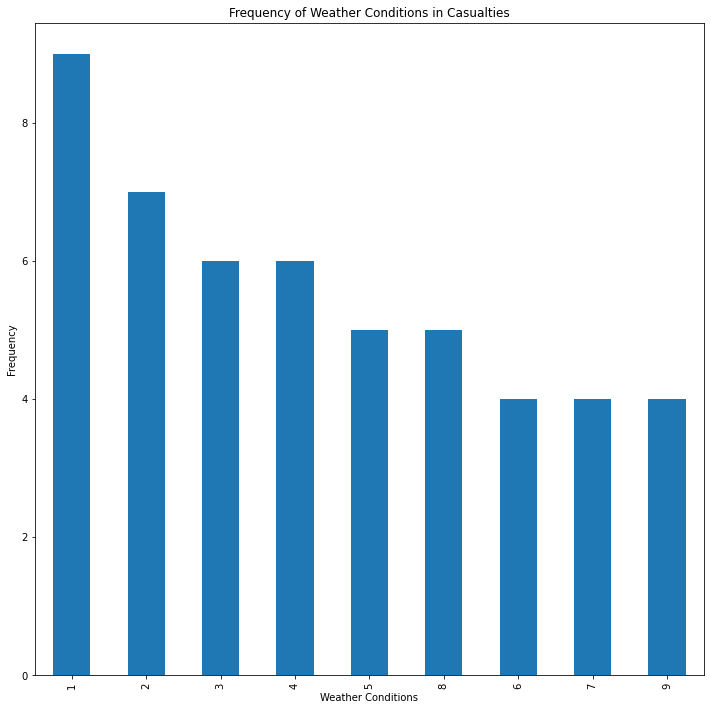

In [61]:
temp_df_wc.plot.bar()
plt.xlabel('Weather Conditions')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions in Casualties')


weather_conditions      1     2    3    4    5   6    7     8     9
count               34202  4149  498  443  441  57  153  1400  1015


Text(0.5, 1.0, 'No of Casualties in different Weather conditions')

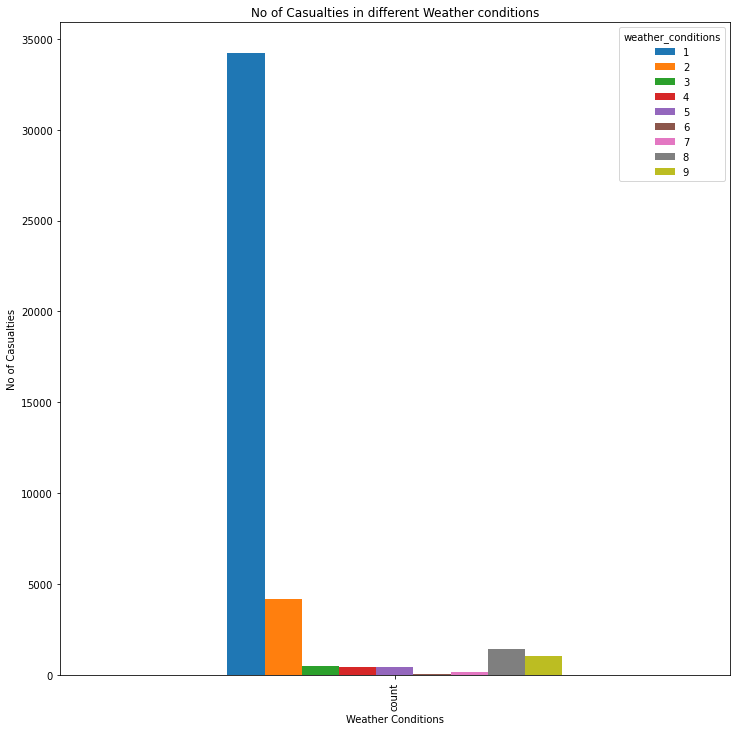

In [62]:

temp_wc = pd.pivot_table(Weather_Distinct_Names, values='count',
                    columns=['weather_conditions'], aggfunc=np.sum)

print(temp_wc)
temp_wc.plot.bar()
plt.xlabel('Weather Conditions')
plt.ylabel('No of Casualties')
plt.title('No of Casualties in different Weather conditions')

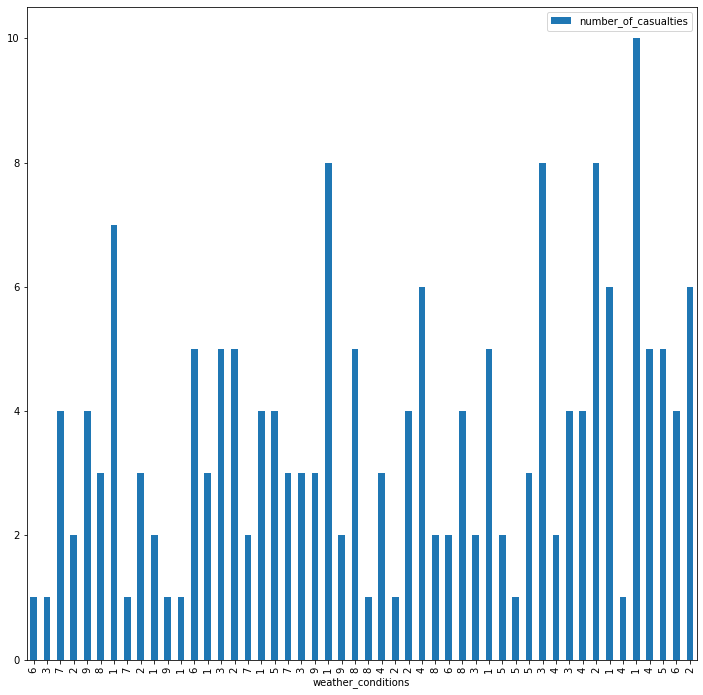

In [25]:
# plt.rcParams['figure.figsize']=[12,12]
# Weather_Distinct_Names.plot(kind='bar', x='weather_conditions', y='number_of_casualties')
# plt.show()

In [26]:
#light_conditions
Light_Distinct_Names = Accidents_Data.groupBy("light_conditions","number_of_casualties").count().toPandas()
Light_Distinct_Names

,light_conditions,number_of_casualties,count
0,6,1,1237
1,7,4,5
2,1,7,12
3,7,1,743
4,4,7,2
5,1,2,4243
6,1,1,27274
7,6,5,20
8,1,3,1097
9,7,2,84


In [63]:
# Light_Distinct_Names = Accidents_Data.groupBy("weather_conditions","number_of_casualties").count().toPandas()
# # Weather_Distinct_Names.head()


temp_df_lc = Light_Distinct_Names['light_conditions'].value_counts()
temp_df_lc.head()


1    9
4    7
6    7
7    5
5    4
Name: light_conditions, dtype: int64

Text(0.5, 1.0, 'Frequency of Light Conditions in Casualties')

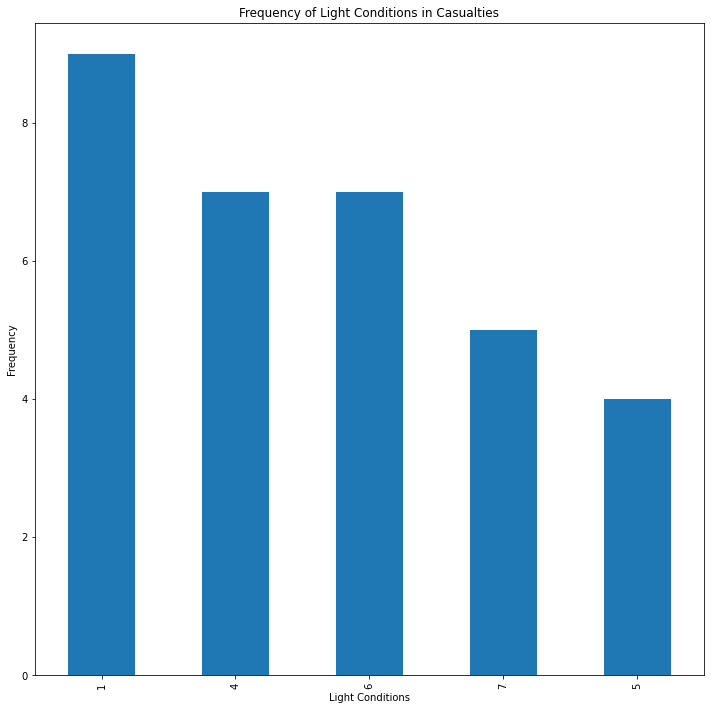

In [64]:
temp_df_lc.plot.bar()
plt.xlabel('Light Conditions')
plt.ylabel('Frequency')
plt.title('Frequency of Light Conditions in Casualties')


light_conditions      1     4    5     6    7
count             33130  6469  245  1663  851


Text(0.5, 1.0, 'No of Casualties in different Light conditions')

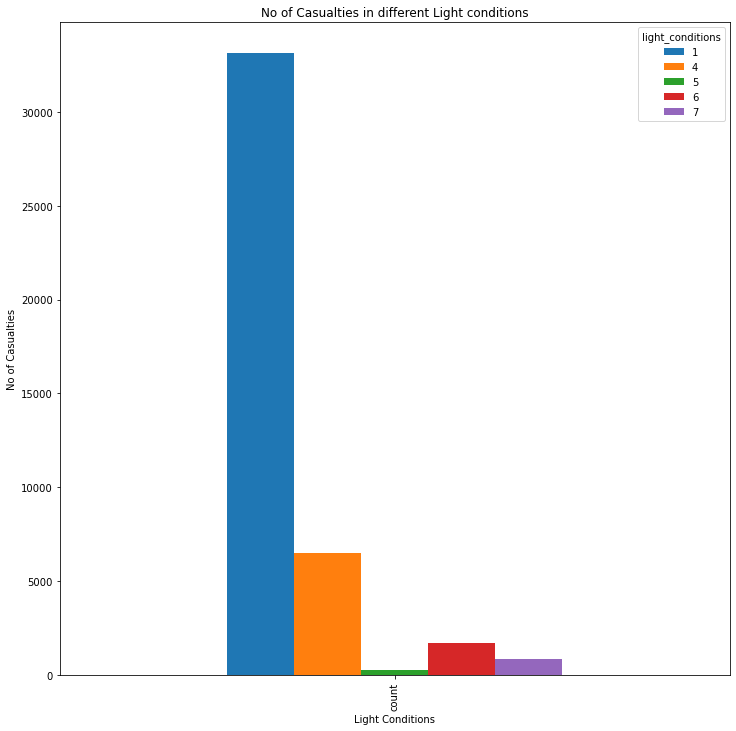

In [53]:
temp_lc = pd.pivot_table(Light_Distinct_Names, values='count',
                    columns=['light_conditions'], aggfunc=np.sum)

print(temp_lc)
temp_lc.plot.bar()
plt.xlabel('Light Conditions')
plt.ylabel('No of Casualties')
plt.title('No of Casualties in different Light conditions')

In [55]:
Speed_Distinct_Names = Accidents_Data.groupBy("speed_limit","number_of_casualties").count().toPandas()
Speed_Distinct_Names


,speed_limit,number_of_casualties,count
0,40,6,4
1,70,2,454
2,20,2,420
3,60,3,283
4,70,7,4
5,50,4,36
6,60,2,908
7,20,3,86
8,70,5,23
9,40,5,16


In [77]:
temp_df_sl = Speed_Distinct_Names['speed_limit'].value_counts()
temp_df_sl.head()


30    9
70    8
50    7
60    7
40    6
Name: speed_limit, dtype: int64

Text(0.5, 1.0, 'Frequency of Speed Limits in Casualties')

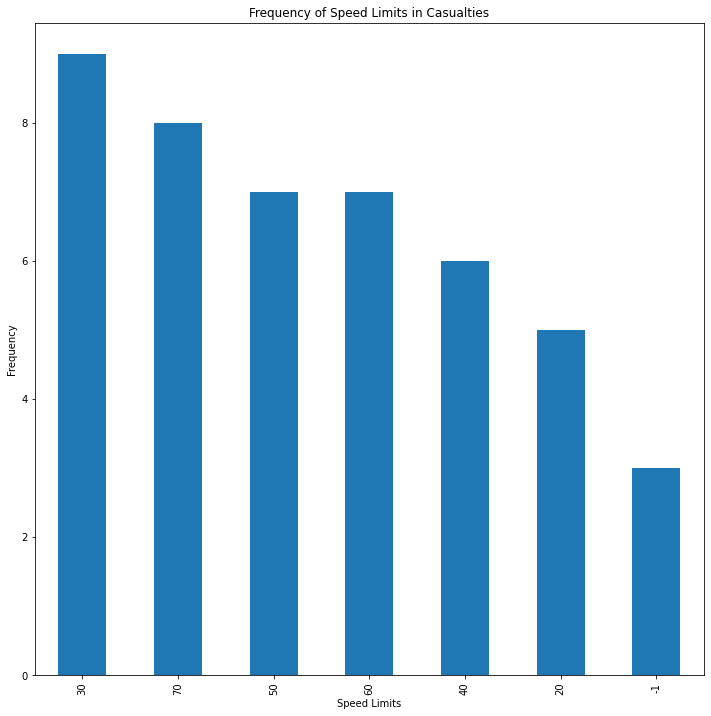

In [66]:
temp_df.plot.bar()
plt.xlabel('Speed Limits')
plt.ylabel('Frequency')
plt.title('Frequency of Speed Limits in Casualties')



speed_limit  -1     20     30    40    50    60    70
count         80  6318  23700  3642  1750  4612  2256


Text(0.5, 1.0, 'No of Casualties in different Speed Limits')

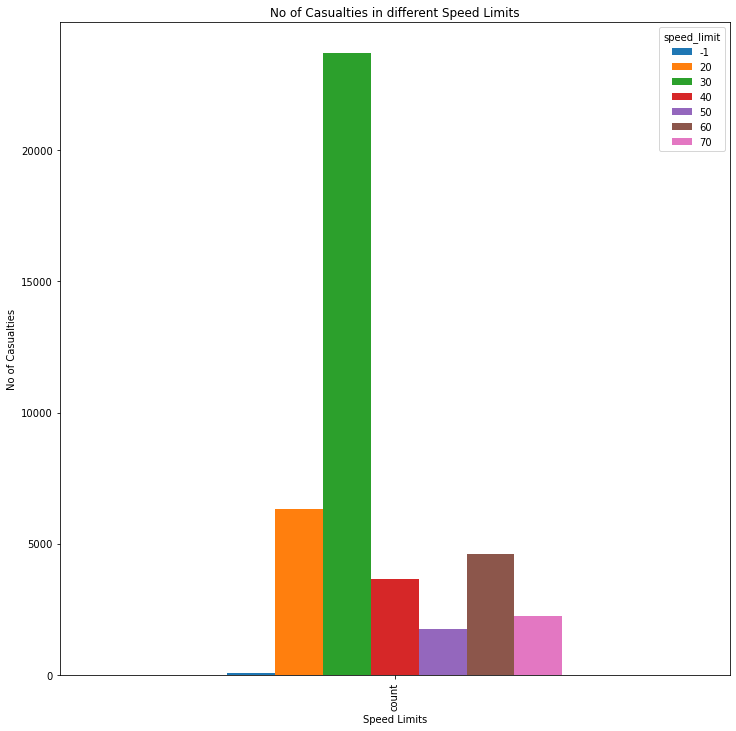

In [67]:

temp_sl = pd.pivot_table(Speed_Distinct_Names, values='count',
                    columns=['speed_limit'], aggfunc=np.sum)

print(temp_sl)
temp_sl.plot.bar()
plt.xlabel('Speed Limits')
plt.ylabel('No of Casualties')
plt.title('No of Casualties in different Speed Limits')

In [ ]:
##### Casulaty Data #########

In [76]:
# Causality_Data.show()
print(Causality_Data.head())
for col in Causality_Data.columns:
    print(col)

Row(status='Unvalidated', accident_index='2021010287148', accident_year=2021, accident_reference='010287148', vehicle_reference=1, casualty_reference=1, casualty_class=1, sex_of_casualty=1, age_of_casualty=19, age_band_of_casualty=4, casualty_severity=3, pedestrian_location=0, pedestrian_movement=0, car_passenger=0, bus_or_coach_passenger=0, pedestrian_road_maintenance_worker=0, casualty_type=9, casualty_home_area_type=1, casualty_imd_decile=10)
status
accident_index
accident_year
accident_reference
vehicle_reference
casualty_reference
casualty_class
sex_of_casualty
age_of_casualty
age_band_of_casualty
casualty_severity
pedestrian_location
pedestrian_movement
car_passenger
bus_or_coach_passenger
pedestrian_road_maintenance_worker
casualty_type
casualty_home_area_type
casualty_imd_decile


In [78]:
Casulty_Data_temp = Causality_Data.groupBy("casualty_severity","age_band_of_casualty", "casualty_type").count().toPandas()
Casulty_Data_temp


,casualty_severity,age_band_of_casualty,casualty_type,count
0,2,3,90,26
1,3,6,19,349
2,1,5,3,2
3,3,1,10,1
4,1,5,97,2
...,...,...,...,...
462,3,10,4,10
463,2,11,5,6
464,3,9,17,3
465,3,4,90,108


In [79]:
temp_casualty_cs = Casulty_Data_temp['casualty_severity'].value_counts()
temp_casualty_cs.head()


3    214
2    172
1     81
Name: casualty_severity, dtype: int64

Text(0.5, 1.0, 'Frequency of Severity in Casualties')

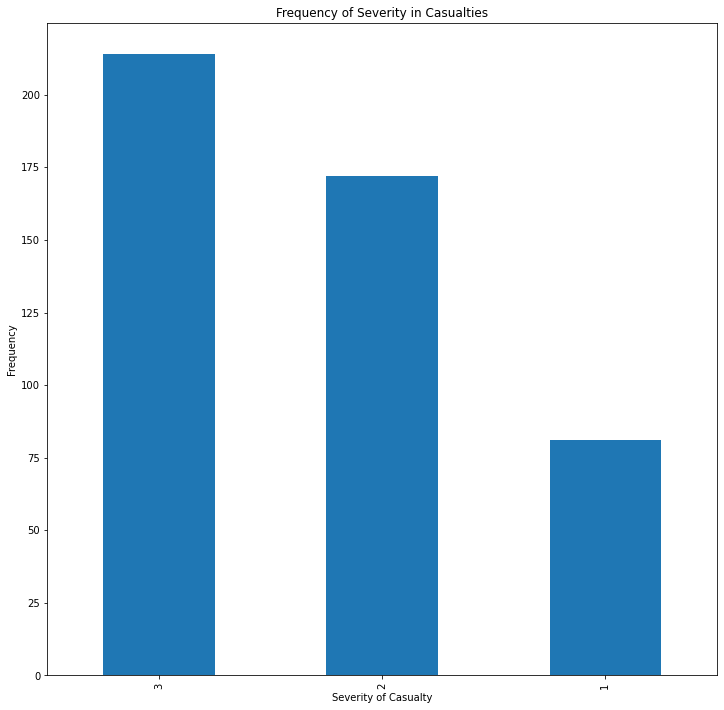

In [81]:

temp_casualty_cs.plot.bar()
plt.xlabel('Severity of Casualty')
plt.ylabel('Frequency')
plt.title('Frequency of Severity in Casualties')


casualty_severity    1     2      3
count              554  9449  43171


Text(0.5, 1.0, 'No of Casualties with different Severity')

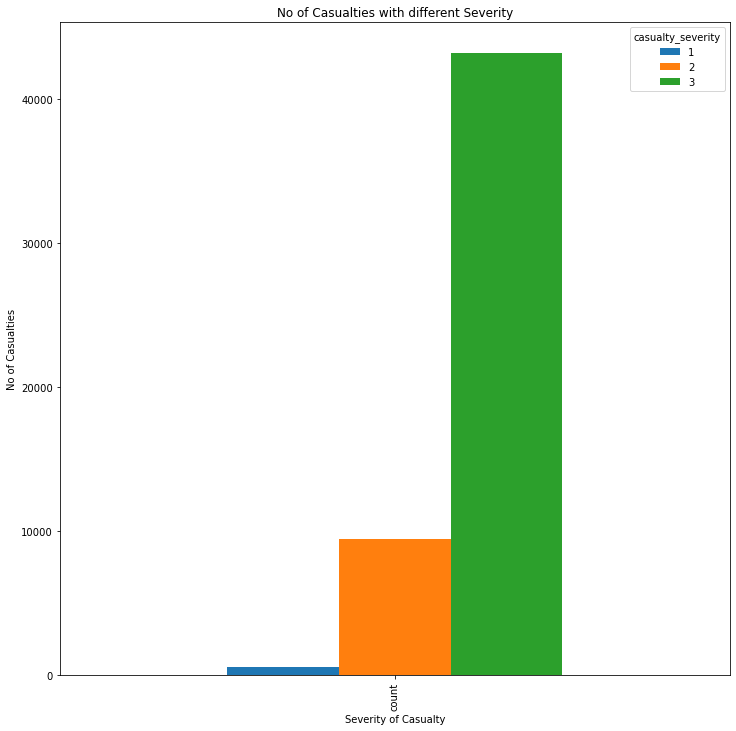

In [84]:

temp_cs = pd.pivot_table(Casulty_Data_temp, values='count',
                    columns=['casualty_severity'], aggfunc=np.sum)

print(temp_cs)
temp_cs.plot.bar()
plt.xlabel('Severity of Casualty')
plt.ylabel('No of Casualties')
plt.title('No of Casualties with different Severity')

In [85]:
temp_casualty_age_band = Casulty_Data_temp['age_band_of_casualty'].value_counts()
temp_casualty_age_band.head()



6    52
8    52
9    50
7    49
5    47
Name: age_band_of_casualty, dtype: int64

Text(0.5, 1.0, 'Frequency of Age Band in Casualties')

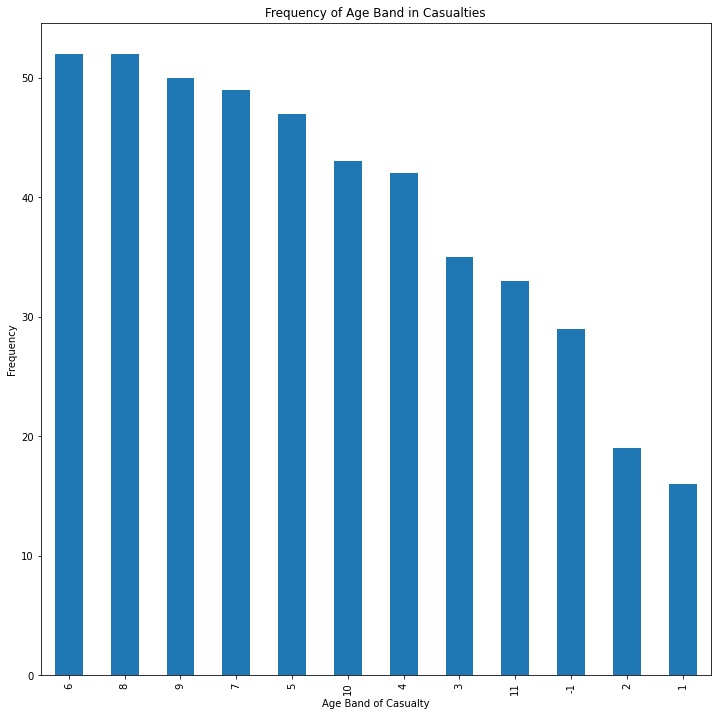

In [86]:
temp_casualty_age_band.plot.bar()
plt.xlabel('Age Band of Casualty')
plt.ylabel('Frequency')
plt.title('Frequency of Age Band in Casualties')



age_band_of_casualty   -1    1     2     3     4     5      6     7     8   \
count                 1240  902  1356  2329  5136  6193  12072  8322  6997   

age_band_of_casualty    9     10    11  
count                 4617  2292  1718  


Text(0.5, 1.0, 'No of Casualties with different Age Groups')

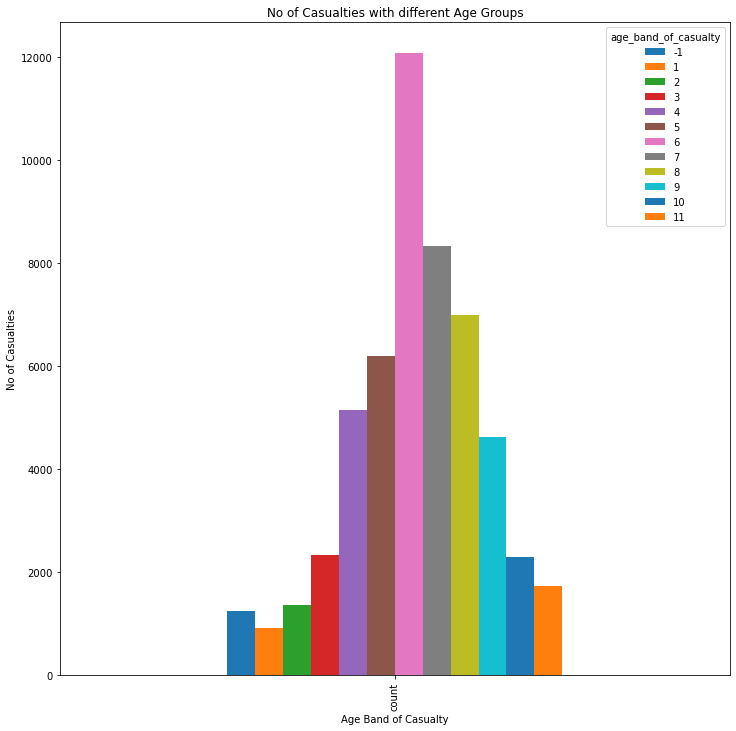

In [88]:
temp_age_band = pd.pivot_table(Casulty_Data_temp, values='count',
                    columns=['age_band_of_casualty'], aggfunc=np.sum)

print(temp_age_band)
temp_age_band.plot.bar()
plt.xlabel('Age Band of Casualty')
plt.ylabel('No of Casualties')
plt.title('No of Casualties with different Age Groups')

In [89]:
temp_casualty_ct = Casulty_Data_temp['casualty_type'].value_counts()
temp_casualty_ct.head()


0     36
1     33
9     33
5     29
90    29
Name: casualty_type, dtype: int64

Text(0.5, 1.0, 'Frequency of Type of Casualty')

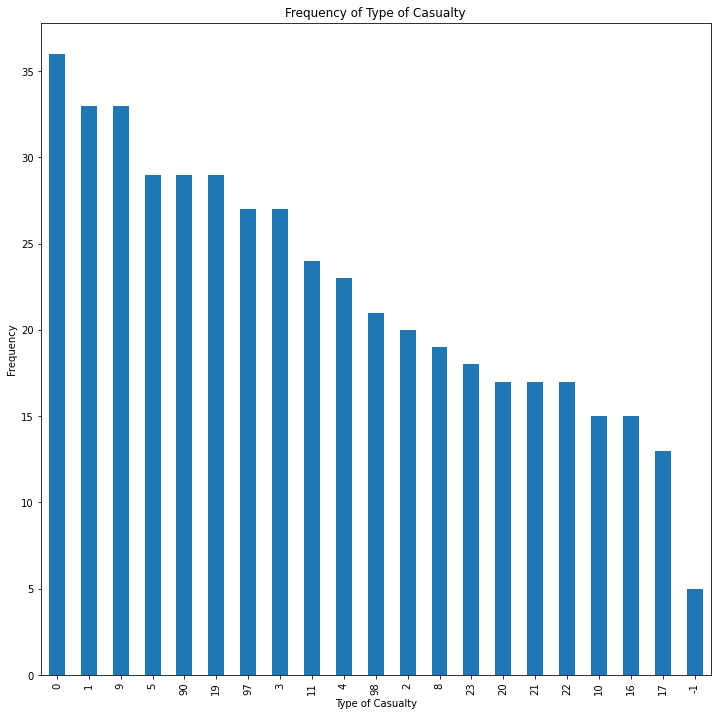

In [90]:
temp_casualty_ct.plot.bar()
plt.xlabel('Type of Casualty')
plt.ylabel('Frequency')
plt.title('Frequency of Type of Casualty')



casualty_type  -1     0     1    2     3    4     5    8      9    10  ...  \
count            9  6644  7300  443  3207  617  1461  556  28499   61  ...   

casualty_type   16   17    19   20   21   22   23   90   97   98  
count           44   31  1430   90  166   94   75  745  622  397  

[1 rows x 21 columns]


Text(0.5, 1.0, 'No of different Type of Casualties ')

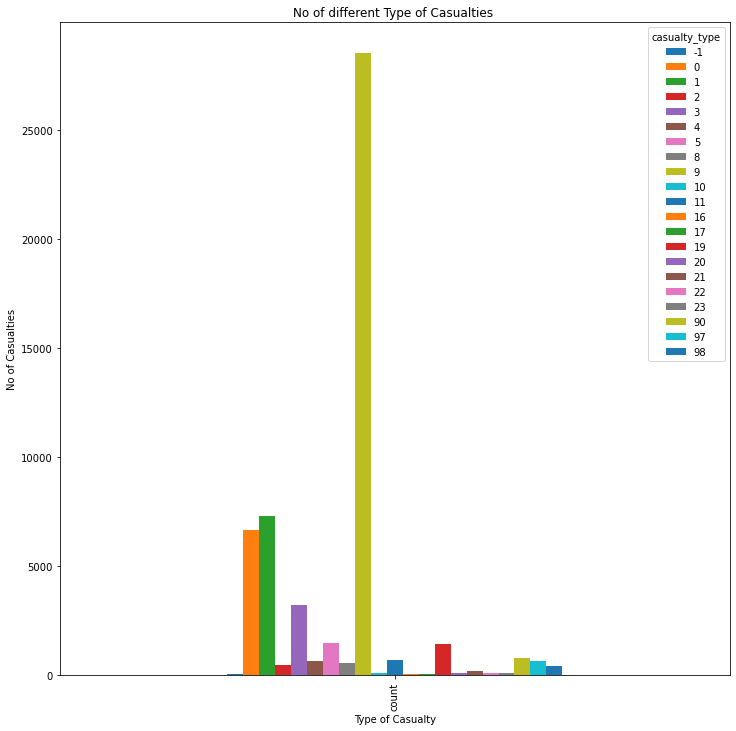

In [91]:
temp_ct = pd.pivot_table(Casulty_Data_temp, values='count',
                    columns=['casualty_type'], aggfunc=np.sum)

print(temp_ct)
temp_ct.plot.bar()
plt.xlabel('Type of Vehicle')
plt.ylabel('No of Casualties')
plt.title('No of different Type of Casualties ')

In [92]:
# Causality_Data.show()
print(Vehicles_Data.head())
for col in Vehicles_Data.columns:
    print(col)
    


Row(status='Unvalidated', accident_index='2021010287232', accident_year=2021, accident_reference='010287232', vehicle_reference=1, vehicle_type=1, towing_and_articulation=0, vehicle_manoeuvre=18, vehicle_direction_from=5, vehicle_direction_to=1, vehicle_location_restricted_lane=4, junction_location=8, skidding_and_overturning=0, hit_object_in_carriageway=0, vehicle_leaving_carriageway=0, hit_object_off_carriageway=0, first_point_of_impact=3, vehicle_left_hand_drive=1, journey_purpose_of_driver=1, sex_of_driver=1, age_of_driver=18, age_band_of_driver=4, engine_capacity_cc=-1, propulsion_code=-1, age_of_vehicle=-1, generic_make_model=-1, driver_imd_decile=-1, driver_home_area_type=-1)
status
accident_index
accident_year
accident_reference
vehicle_reference
vehicle_type
towing_and_articulation
vehicle_manoeuvre
vehicle_direction_from
vehicle_direction_to
vehicle_location_restricted_lane
junction_location
skidding_and_overturning
hit_object_in_carriageway
vehicle_leaving_carriageway
hit_ob

In [94]:

Vehicles_Data_temp = Vehicles_Data.groupBy("vehicle_type","junction_location", 
                                            "skidding_and_overturning", "age_band_of_driver", 
                                            "generic_make_model", "age_of_vehicle").count().toPandas()
Vehicles_Data_temp


,vehicle_type,junction_location,skidding_and_overturning,age_band_of_driver,generic_make_model,age_of_vehicle,count
0,3,0,9,5,-1,-1,28
1,19,8,0,10,-1,-1,22
2,22,2,0,7,-1,-1,2
3,10,0,0,5,-1,-1,1
4,4,1,2,4,-1,-1,1
...,...,...,...,...,...,...,...
2625,1,1,1,9,-1,-1,5
2626,4,6,0,8,-1,-1,1
2627,1,3,2,6,-1,-1,1
2628,1,-1,-1,3,-1,-1,2


In [95]:

temp_vehicle_type = Vehicles_Data_temp['vehicle_type'].value_counts()
temp_vehicle_type.head()



9     404
1     315
3     226
19    191
5     178
Name: vehicle_type, dtype: int64

Text(0.5, 1.0, 'Frequency of Type of Vehicle in a accident')

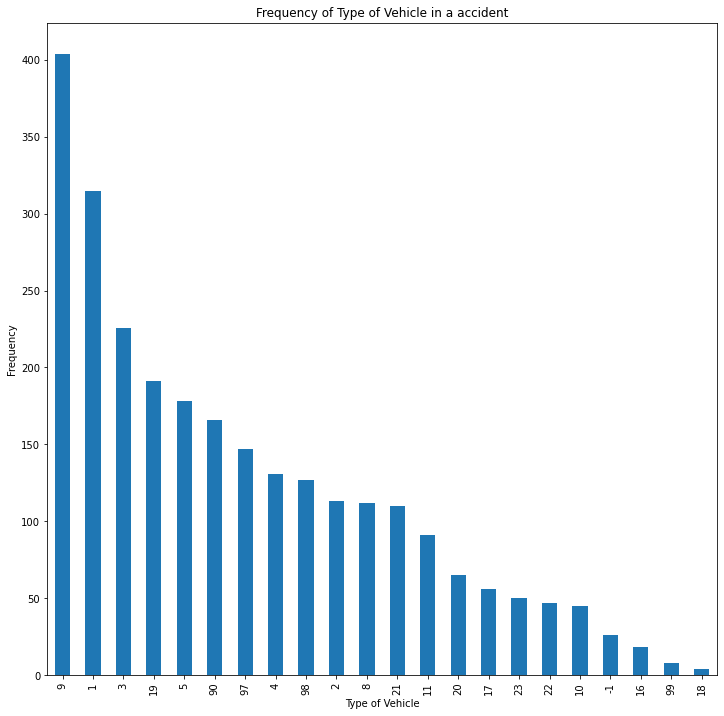

In [96]:
temp_vehicle_type.plot.bar()
plt.xlabel('Type of Vehicle')
plt.ylabel('Frequency')
plt.title('Frequency of Type of Vehicle in a accident')



vehicle_type  -1     1    2     3    4     5     8      9    10    11  ...  \
count         139  7547  495  3456  659  1488  1132  52684  116  1094  ...   

vehicle_type   18    19   20   21   22   23    90   97    98   99  
count           6  4663  298  860  105   87  1220  739  1419   12  

[1 rows x 22 columns]


Text(0.5, 1.0, 'No of different Type of Vehicles in Casualties ')

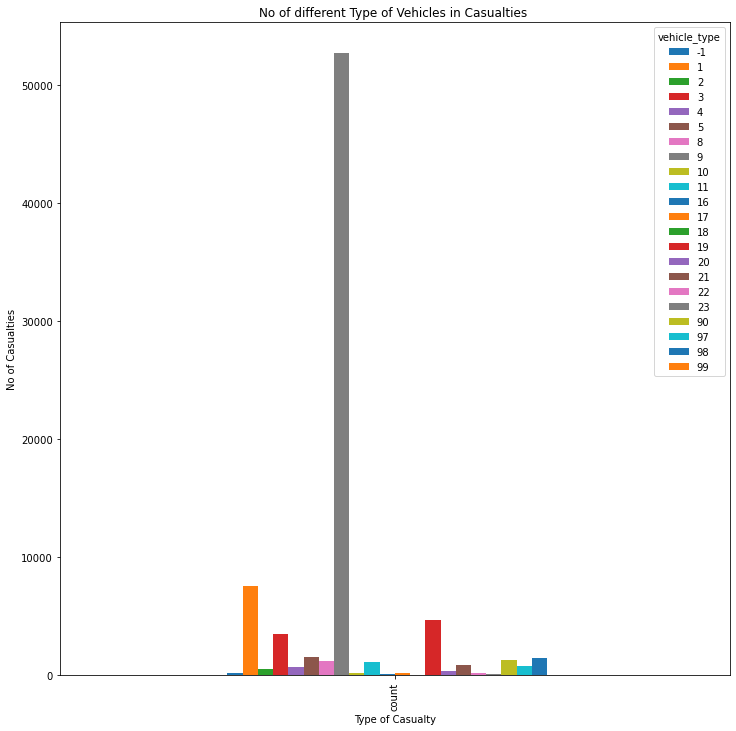

In [97]:
temp_vt = pd.pivot_table(Vehicles_Data_temp, values='count',
                    columns=['vehicle_type'], aggfunc=np.sum)

print(temp_vt)
temp_vt.plot.bar()
plt.xlabel('Type of Vehicle')
plt.ylabel('No of Casualties')
plt.title('No of different Type of Vehicles in Casualties ')

In [98]:
temp_vehicle_jt = Vehicles_Data_temp['junction_location'].value_counts()
temp_vehicle_jt.head()



0    613
1    437
8    364
2    267
4    185
Name: junction_location, dtype: int64

Text(0.5, 1.0, 'Frequency of Juunction Location in a Casualty')

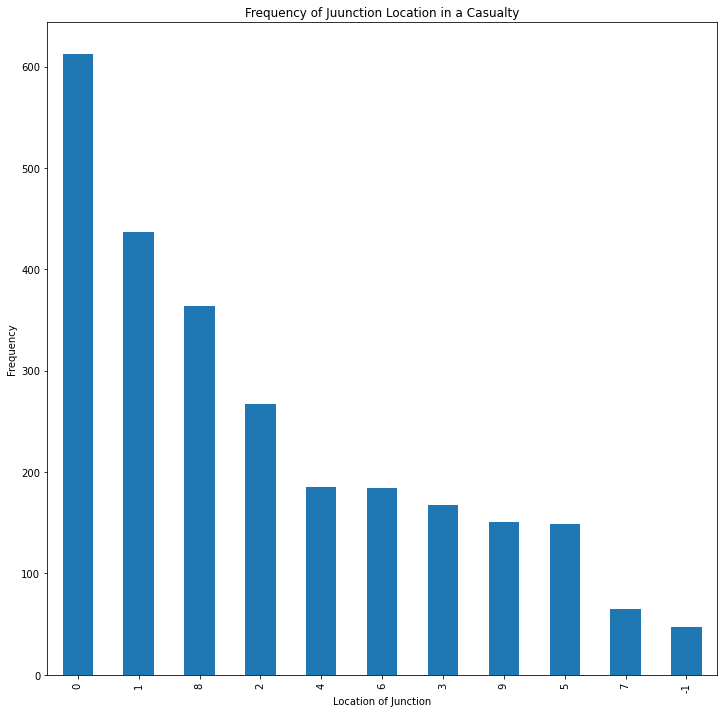

In [99]:
temp_vehicle_jt.plot.bar()
plt.xlabel('Location of Junction')
plt.ylabel('Frequency')
plt.title('Frequency of Juunction Location in a Casualty')



junction_location   -1      0      1     2     3     4     5     6    7  \
count              153  30911  17599  4238  1226  2302  1722  3111  227   

junction_location      8     9  
count              11571  5351  


Text(0.5, 1.0, 'No of different Locations of a Junction contributing to Casualties ')

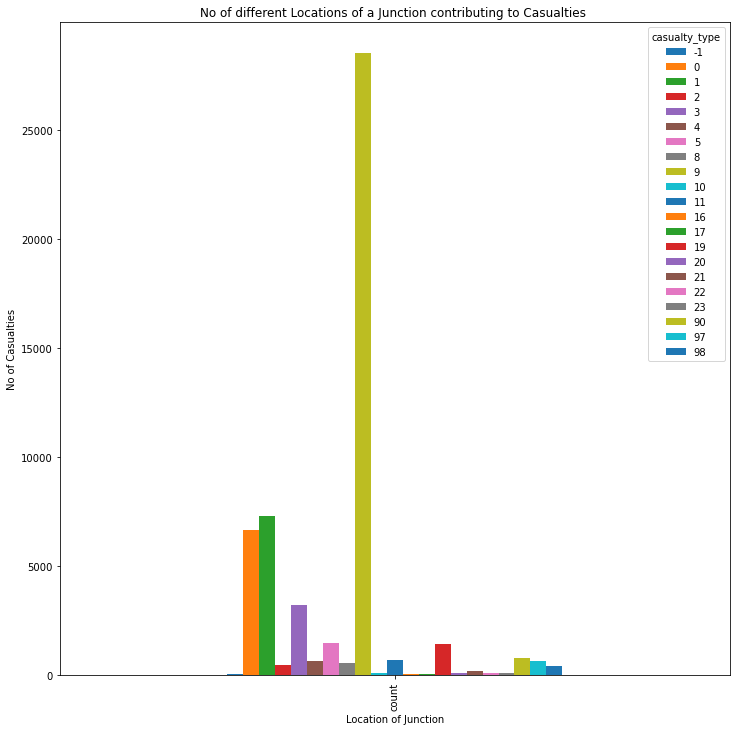

In [101]:
temp_jt = pd.pivot_table(Vehicles_Data_temp, values='count',
                    columns=['junction_location'], aggfunc=np.sum)

print(temp_jt)
temp_ct.plot.bar()
plt.xlabel('Location of Junction')
plt.ylabel('No of Casualties')
plt.title('No of different Locations of a Junction contributing to Casualties ')

In [108]:
temp_vehicle__driver_age = Vehicles_Data_temp['age_band_of_driver'].value_counts()
temp_vehicle__driver_age.head()



 6    402
 8    347
 7    346
 9    300
-1    297
Name: age_band_of_driver, dtype: int64

Text(0.5, 1.0, 'Frequency of Vehicle Driver Age in Casualties')

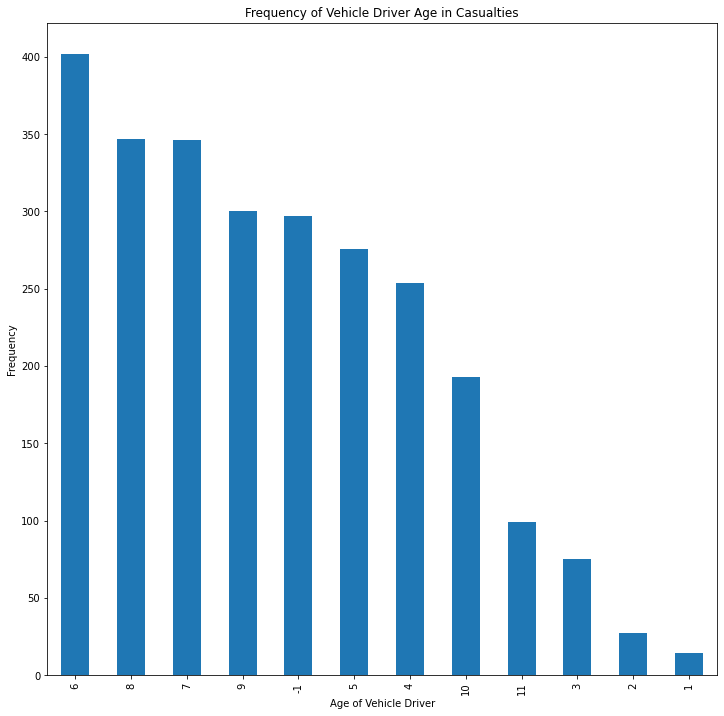

In [109]:
temp_vehicle__driver_age.plot.bar()
plt.xlabel('Age of Vehicle Driver')
plt.ylabel('Frequency')
plt.title('Frequency of Vehicle Driver Age in Casualties')



age_band_of_driver    -1    1    2    3     4     5      6      7      8   \
count               11069   39  154  790  4842  7673  17620  13021  10873   

age_band_of_driver    9     10    11  
count               7245  3215  1870  


Text(0.5, 1.0, 'No of Casualties in Vehicle Driver Age Band')

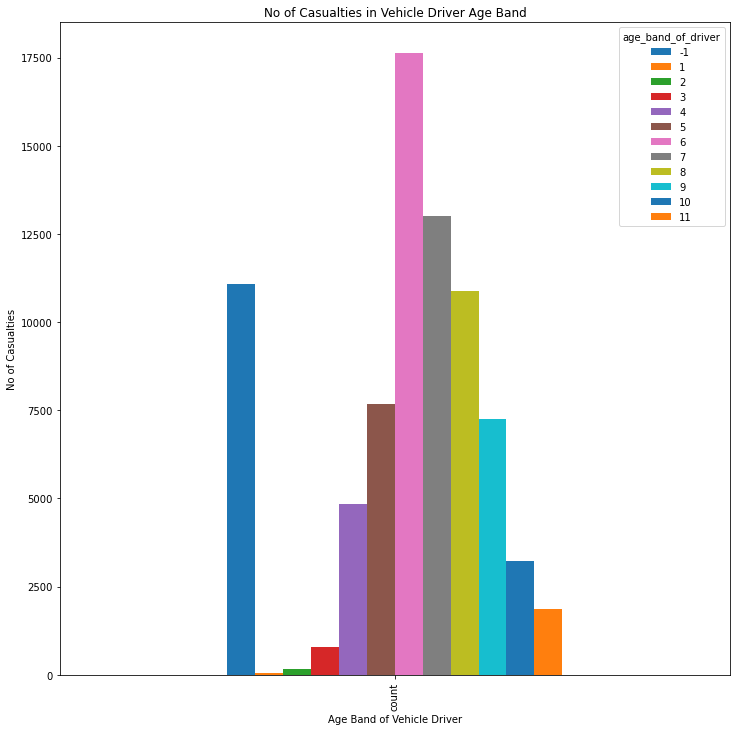

In [111]:
temp_age_vehicle_driver = pd.pivot_table(Vehicles_Data_temp, values='count',
                    columns=['age_band_of_driver'], aggfunc=np.sum)

print(temp_age_vehicle_driver)
temp_age_vehicle_driver.plot.bar()
plt.xlabel('Age Band of Vehicle Driver')
plt.ylabel('No of Casualties')
plt.title('No of Casualties in Vehicle Driver Age Band')